### MNIST Hand-Written Digit Recognition Using Tensorflow 

In this notebook you will learn how to implement basic neural network for hand-written digit recognition in tensorflow. We assume that you read the `MNIST_numpy.ipynb` notebook where we implement equivalent network in pure numpy. Loading the data and libraries will be the same as there. 

In [1]:
import numpy as np
np.random.seed(0)
import tensorflow as tf
import matplotlib.pyplot as plt  

#### Load the Data

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images 
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images 
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### Define the Tensorflow Graph

In [3]:
layer_in_size = 28 ** 2
layer_1_size = 64
layer_2_size = 32
layer_out_size = 10

In [4]:
W_0 = np.random.randn(layer_1_size, layer_in_size) / np.sqrt(layer_in_size) ## the np.sqrt() term is there 
b_0 = np.random.randn(layer_1_size, 1)                                      ## so that each entry of the output 
                                                                            ## vector has variance +/- 1 
W_1 = np.random.randn(layer_2_size, layer_1_size) / np.sqrt(layer_1_size)
b_1 = np.random.randn(layer_2_size, 1)

W_2 = np.random.randn(layer_out_size, layer_2_size) / np.sqrt(layer_2_size)
b_2 = np.random.randn(layer_out_size, 1)

Now we have defined the architecture of our neural network and set the initial values of its parameters it is time to implement the neural network itself. This is equivalent to the `forward_pass` function in the `MNIST_numpy` notebook. Note that we do not work directly with the $W$s, $b$s or $x$, but instead we define abstract entities that represent them (we use `tf.Variable` for model variables and `tf.placeholder` for data) so we can feed them the actual values later. Bunch of these entities connected together via mathematical operations is called a tensorflow graph. 

In [5]:
x_tf = tf.placeholder(shape = (layer_in_size, 1), dtype = tf.float32)
y_tf = tf.placeholder(shape = (layer_out_size, 1), dtype = tf.float32)

W_0_tf = tf.Variable(initial_value = W_0, dtype = tf.float32) 
b_0_tf = tf.Variable(initial_value = b_0, dtype = tf.float32)

W_1_tf = tf.Variable(initial_value = W_1, dtype = tf.float32) 
b_1_tf = tf.Variable(initial_value = b_1, dtype = tf.float32)

W_2_tf = tf.Variable(initial_value = W_2, dtype = tf.float32) 
b_2_tf = tf.Variable(initial_value = b_2, dtype = tf.float32)

z_0_tf = W_0_tf @ x_tf + b_0_tf
a_0_tf = tf.sigmoid(z_0_tf)
    
z_1_tf = W_1_tf @ a_0_tf + b_1_tf
a_1_tf = tf.sigmoid(z_1_tf)
    
z_2_tf = W_2_tf @ a_1_tf + b_2_tf
a_2_tf = tf.nn.softmax(z_2_tf, axis = 0)

loss = - tf.transpose(y_tf) @ tf.log(a_2_tf)

The big advantage and reason why to use tensorflow is that we do not have to define the `backward_pass` function, tensorflow can calculate the gradients automatically for us using the function `tf.gradients(loss, ...)`. However we will not use it directly, but we will call built-in tensorflow optimizer (that calls the gradients function anyway). 

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
step = optimizer.minimize(loss)

#### Train the Neural Network
Training of the neural network is now a simple matter. We just need to know how to feed the actual data to the tensorflow graph, this is done using something called a `Session`.

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
batch_size = 32

for i in range(batch_size * 1000): 
    index = np.random.choice(train_data.shape[0])
    x = train_data[index].reshape(-1,1)
    y = np.zeros((10, 1))
    y[train_labels[index]] = 1
    loss_eval, _ = sess.run([loss, step], feed_dict = {x_tf : x, y_tf : y})
    if i % (batch_size * 100) == 0: 
        print("Cross entropy ",loss_eval[0][0])    

Cross entropy  2.6237633
Cross entropy  2.101473
Cross entropy  0.7653105
Cross entropy  0.7523788
Cross entropy  1.0206386
Cross entropy  0.4656282
Cross entropy  0.5245925
Cross entropy  0.26203924
Cross entropy  1.095953
Cross entropy  0.18786305


#### Try How It Works

The predicted number is:  3


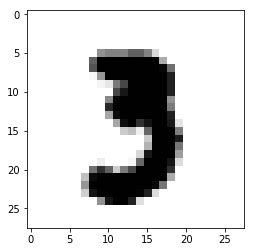

In [14]:
image_number = 93 # Number between 0 and 10 000 

x = eval_data[image_number]
y = np.argmax(sess.run(a_2_tf, feed_dict = {x_tf : x.reshape(784, 1)}))
print("The predicted number is: ", y)
plt.imshow(-x.reshape((28,28)), cmap="gray")
plt.show()